In [ ]:
#Import the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import datetime
import calendar

import math
from sklearn.preprocessing import MinMaxScaler

from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Dense, LSTM

!pip install calplot
import calplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.3/132.3 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for calplot: filename=calplot-0.1.7.5-py3-none-any.whl size=8115 sha256=c0ca47d24ba613064d0cfd90d79f544657c6578c7f2420f445a007ec96115df7
  Stored in directory: /root/.cache/pip/wheels/77/75/32/a518a4a1421776a93e1ede33cb8dac474095bf31fed7e4e22c
Successfully built calplot


In [ ]:
#Read the csv file

df = pd.read_csv('/content/Chennai_AQIBulletins.csv')
df.head(15)

,date,City,No. Stations,Air Quality,Index Value,Prominent Pollutant
0,2015-05-01,Chennai,NaN,Satisfactory,87,CO
1,2015-05-02,Chennai,NaN,Moderate,120,PM2.5
2,2015-05-03,Chennai,NaN,Satisfactory,90,PM2.5
3,2015-05-04,Chennai,NaN,Satisfactory,88,PM2.5
4,2015-05-05,Chennai,NaN,Moderate,124,PM2.5
5,2015-05-06,Chennai,NaN,Moderate,135,PM2.5
6,2015-05-07,Chennai,NaN,Moderate,146,PM2.5
7,2015-05-08,Chennai,NaN,Moderate,146,PM2.5
8,2015-05-10,Chennai,NaN,Moderate,143,PM2.5
9,2015-05-11,Chennai,NaN,Poor,233,"CO, PM2.5"


In [ ]:
#Get information about the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3074 entries, 0 to 3073
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 3074 non-null   object 
 1   City                 3074 non-null   object 
 2   No. Stations         3062 non-null   float64
 3   Air Quality          3074 non-null   object 
 4   Index Value          3074 non-null   int64  
 5   Prominent Pollutant  3074 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 144.2+ KB


In [ ]:
df.describe()

,No. Stations,Index Value
count,3062.000000,3074.000000
mean,4.319726,86.627521
std,2.193810,39.520386
min,1.000000,28.000000
25%,3.000000,60.000000
50%,3.000000,75.000000
75%,7.000000,103.000000
max,9.000000,399.000000


In [ ]:
#Display all unique values in the column 'Air Quality'

df['Air Quality'].unique()

array(['Satisfactory', 'Moderate', 'Poor', 'Good', 'Very Poor'],
      dtype=object)

In [ ]:
#Convert date column from 'object' datatype to 'datetime' datatype

df['date'] = pd.to_datetime(df['date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3074 entries, 0 to 3073
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 3074 non-null   datetime64[ns]
 1   City                 3074 non-null   object        
 2   No. Stations         3062 non-null   float64       
 3   Air Quality          3074 non-null   object        
 4   Index Value          3074 non-null   int64         
 5   Prominent Pollutant  3074 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 144.2+ KB


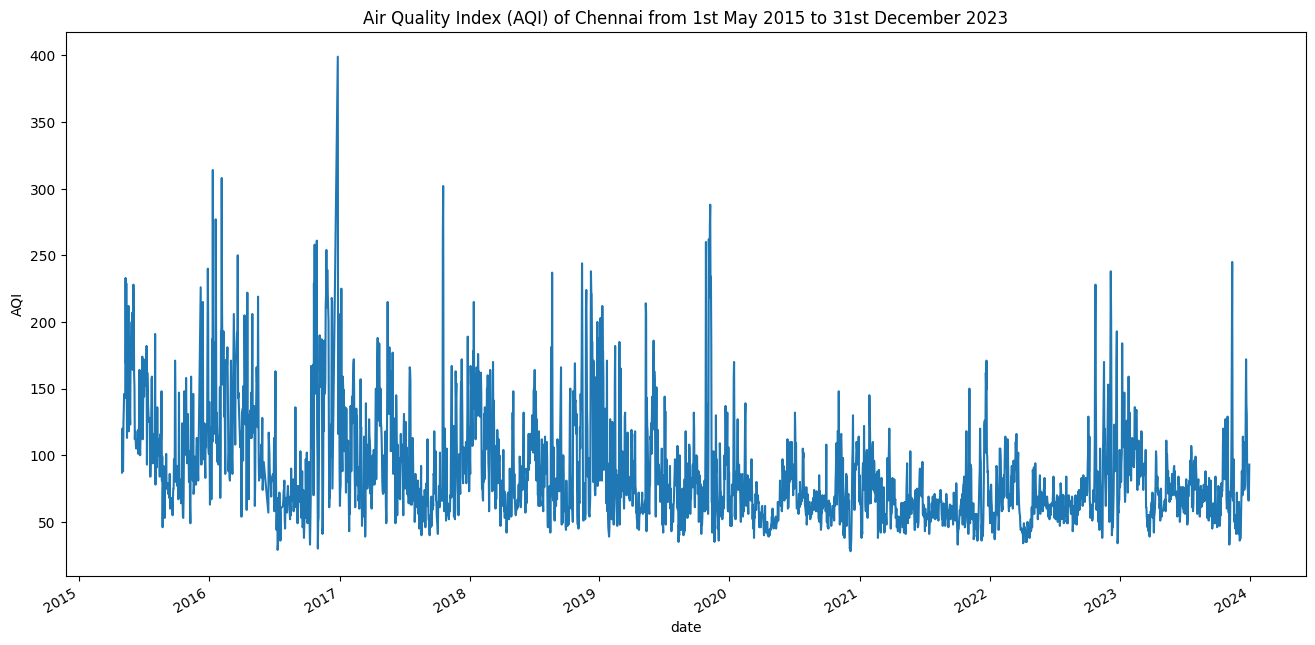

In [ ]:
#Plot of AQI values from 1st May 2015 to 31st December 2023

df.plot(x='date', y='Index Value', figsize=(16, 8), legend=None)
plt.ylabel('AQI')
plt.title('Air Quality Index (AQI) of Chennai from 1st May 2015 to 31st December 2023')
plt.show()

In [ ]:
#Create a pivot table to calculate the average AQI for each month across different years 

data_month = pd.pivot_table(df, index=df['date'].dt.year, columns=df['date'].dt.month, values='Index Value', aggfunc=np.mean)
data_month

date,1,2,3,4,5,6,7,8,9,10,11,12
date,,,,,,,,,,,,
2015,NaN,NaN,NaN,NaN,155.931034,130.923077,129.133333,100.166667,79.800000,92.428571,98.777778,128.347826
2016,134.758621,147.384615,145.315789,125.607143,121.310345,87.727273,65.320000,69.433333,65.633333,122.064516,153.566667,147.470588
2017,105.258065,108.357143,88.580645,117.931034,115.612903,94.344828,95.516129,63.700000,68.433333,86.700000,86.800000,107.612903
2018,142.032258,110.178571,98.193548,67.133333,79.967742,98.100000,97.806452,86.032258,79.703704,94.129032,109.100000,125.516129
2019,114.870968,86.285714,88.548387,70.466667,95.612903,99.275862,71.838710,65.193548,82.333333,83.258065,116.133333,79.580645
2020,81.548387,76.172414,61.806452,47.300000,59.354839,81.633333,76.709677,61.161290,63.566667,63.290323,73.633333,76.354839
2021,79.903226,77.964286,67.290323,58.300000,61.580645,65.766667,57.225806,59.677419,59.233333,63.161290,57.766667,87.032258
2022,63.967742,80.285714,77.870968,43.166667,69.290323,65.033333,59.774194,59.451613,68.233333,87.645161,85.833333,98.677419
2023,107.000000,102.107143,71.838710,66.300000,74.483871,70.900000,74.193548,72.677419,61.166667,80.709677,72.100000,84.931034


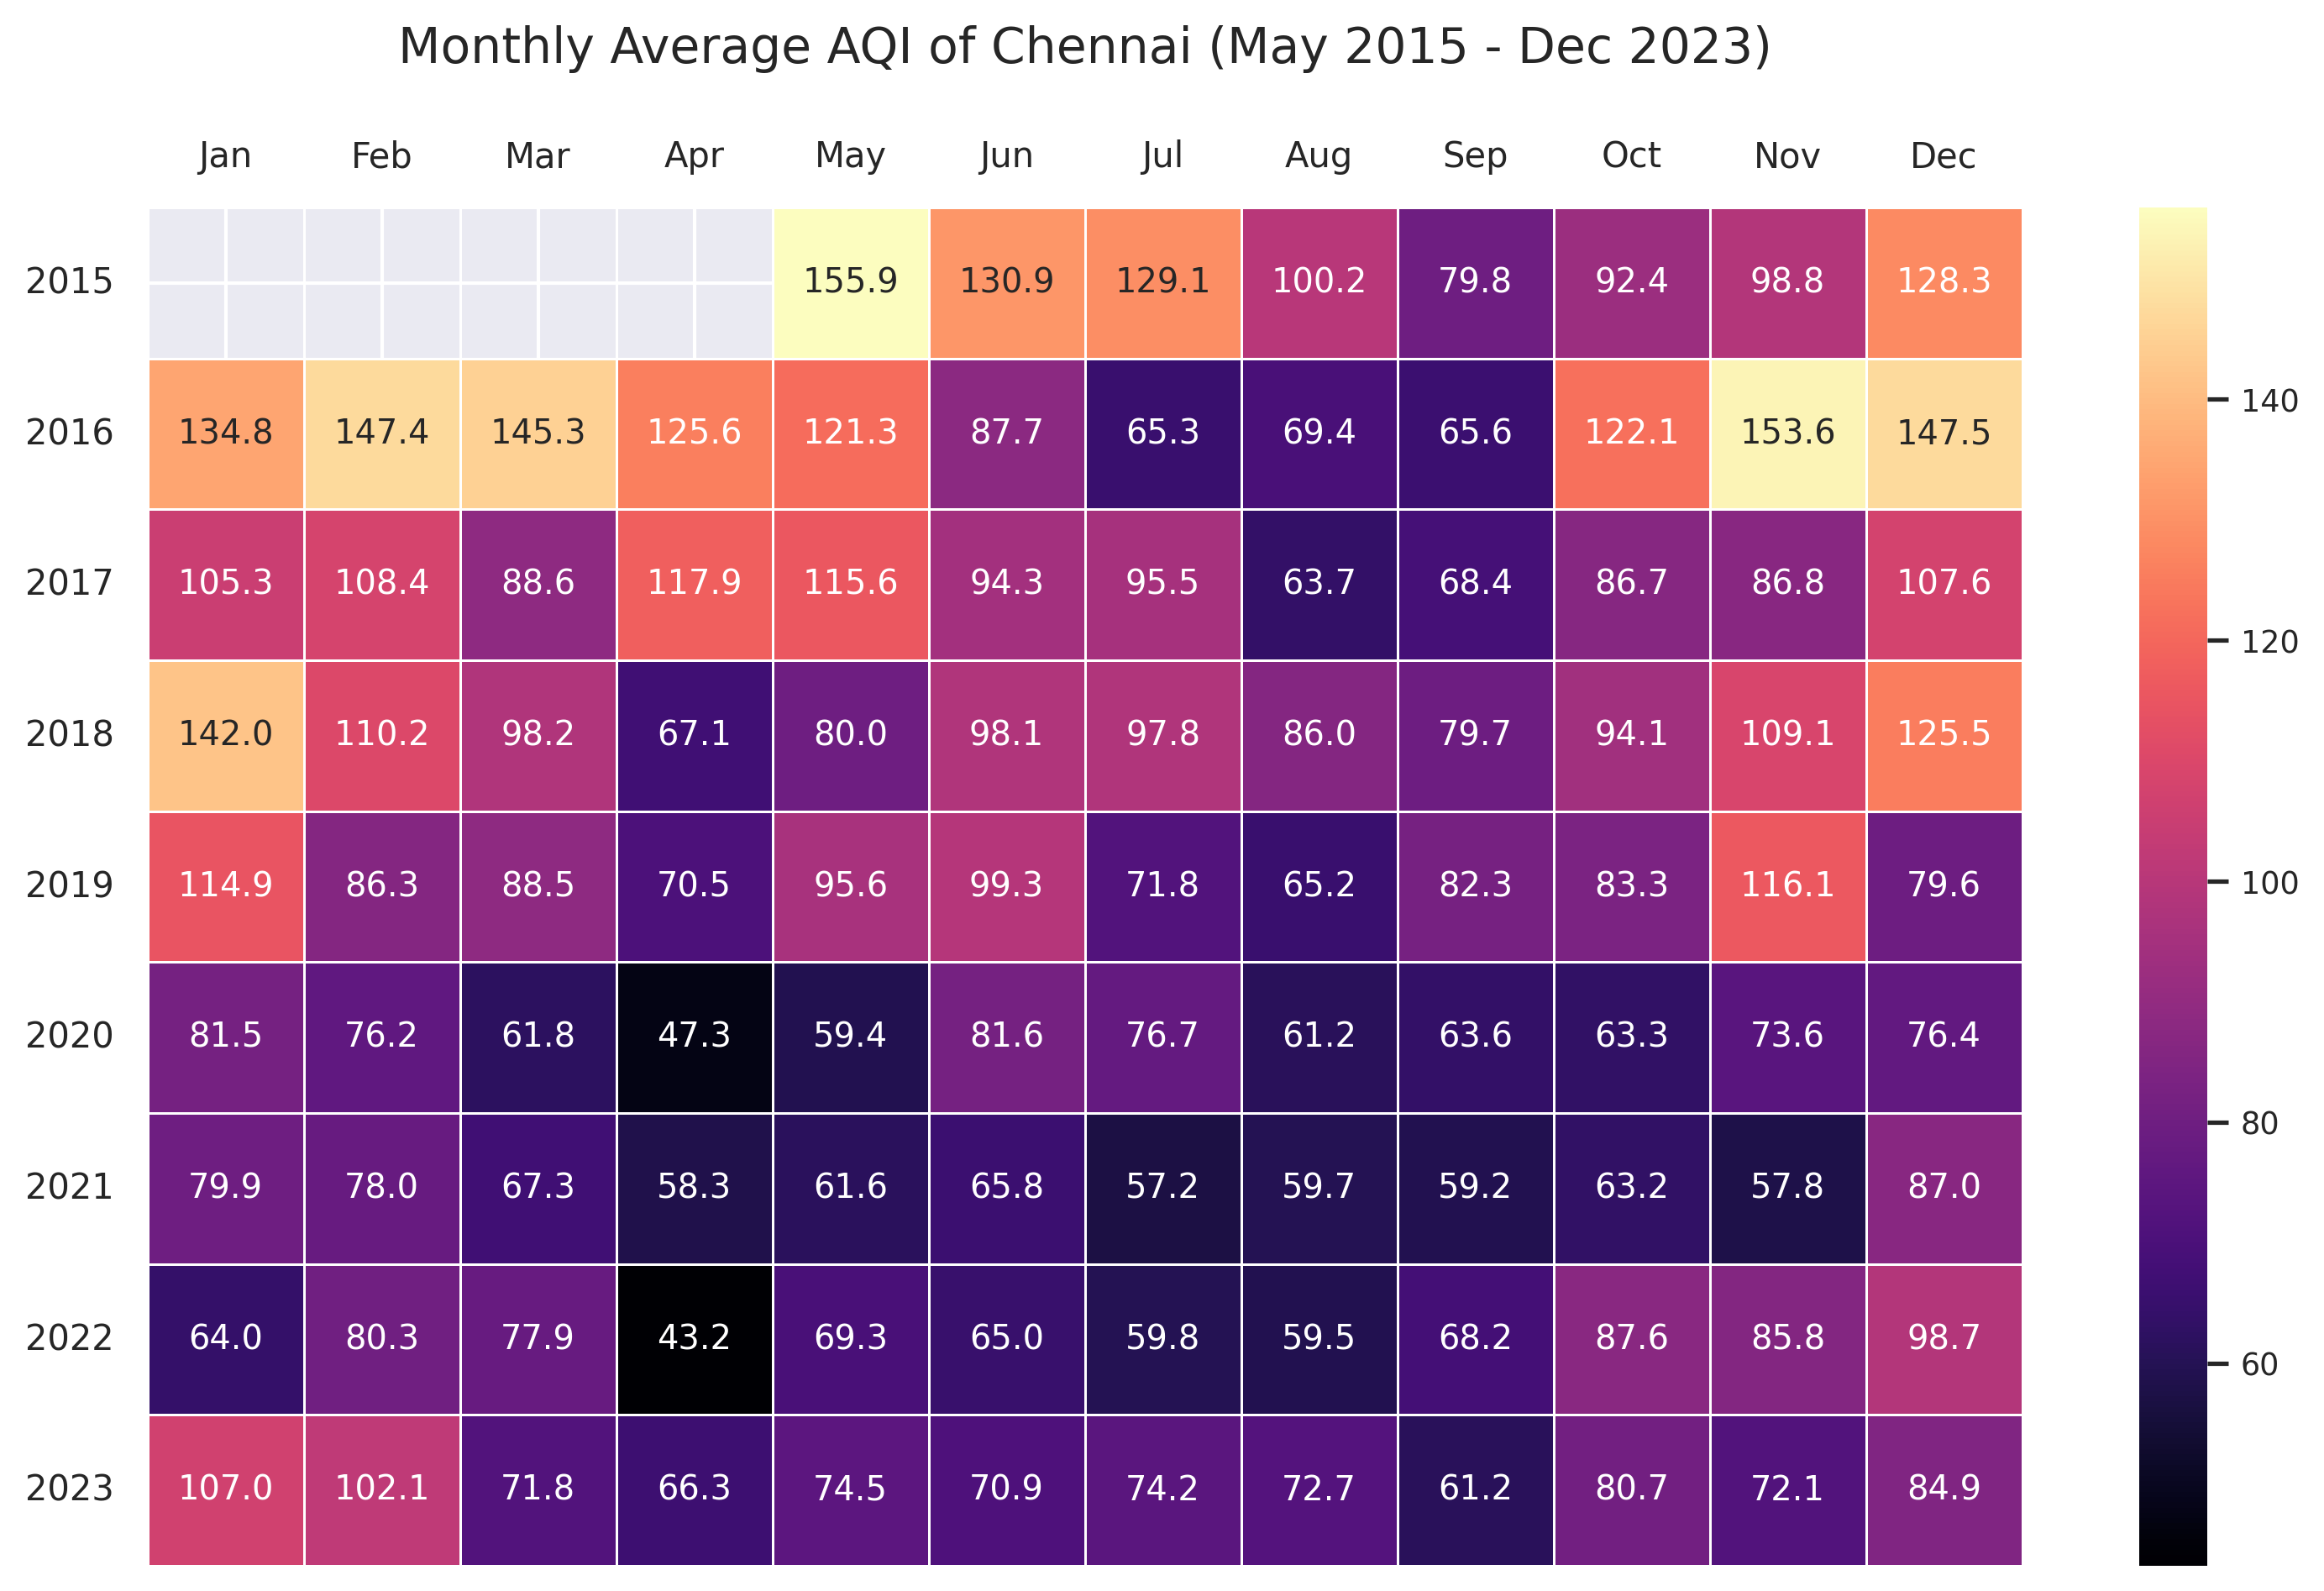

In [ ]:
#Visualise the average AQI for each month across different years as a heatmap

sns.set(font_scale=0.8)
plt.figure(dpi=300)
ax = sns.heatmap(data_month, annot=True, fmt=".1f", xticklabels=[calendar.month_abbr[i] for i in range(1, 13)], linewidths=0.3, cmap='magma')
fig = ax.get_figure()
fig.set_size_inches(12, 7)
ax.set_title('Monthly Average AQI of Chennai (May 2015 - Dec 2023)\n', fontsize=14)
ax.set_ylabel('')
ax.set_xlabel('')
plt.yticks(rotation=0)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
fig.show()

<Figure size 3840x2880 with 0 Axes>

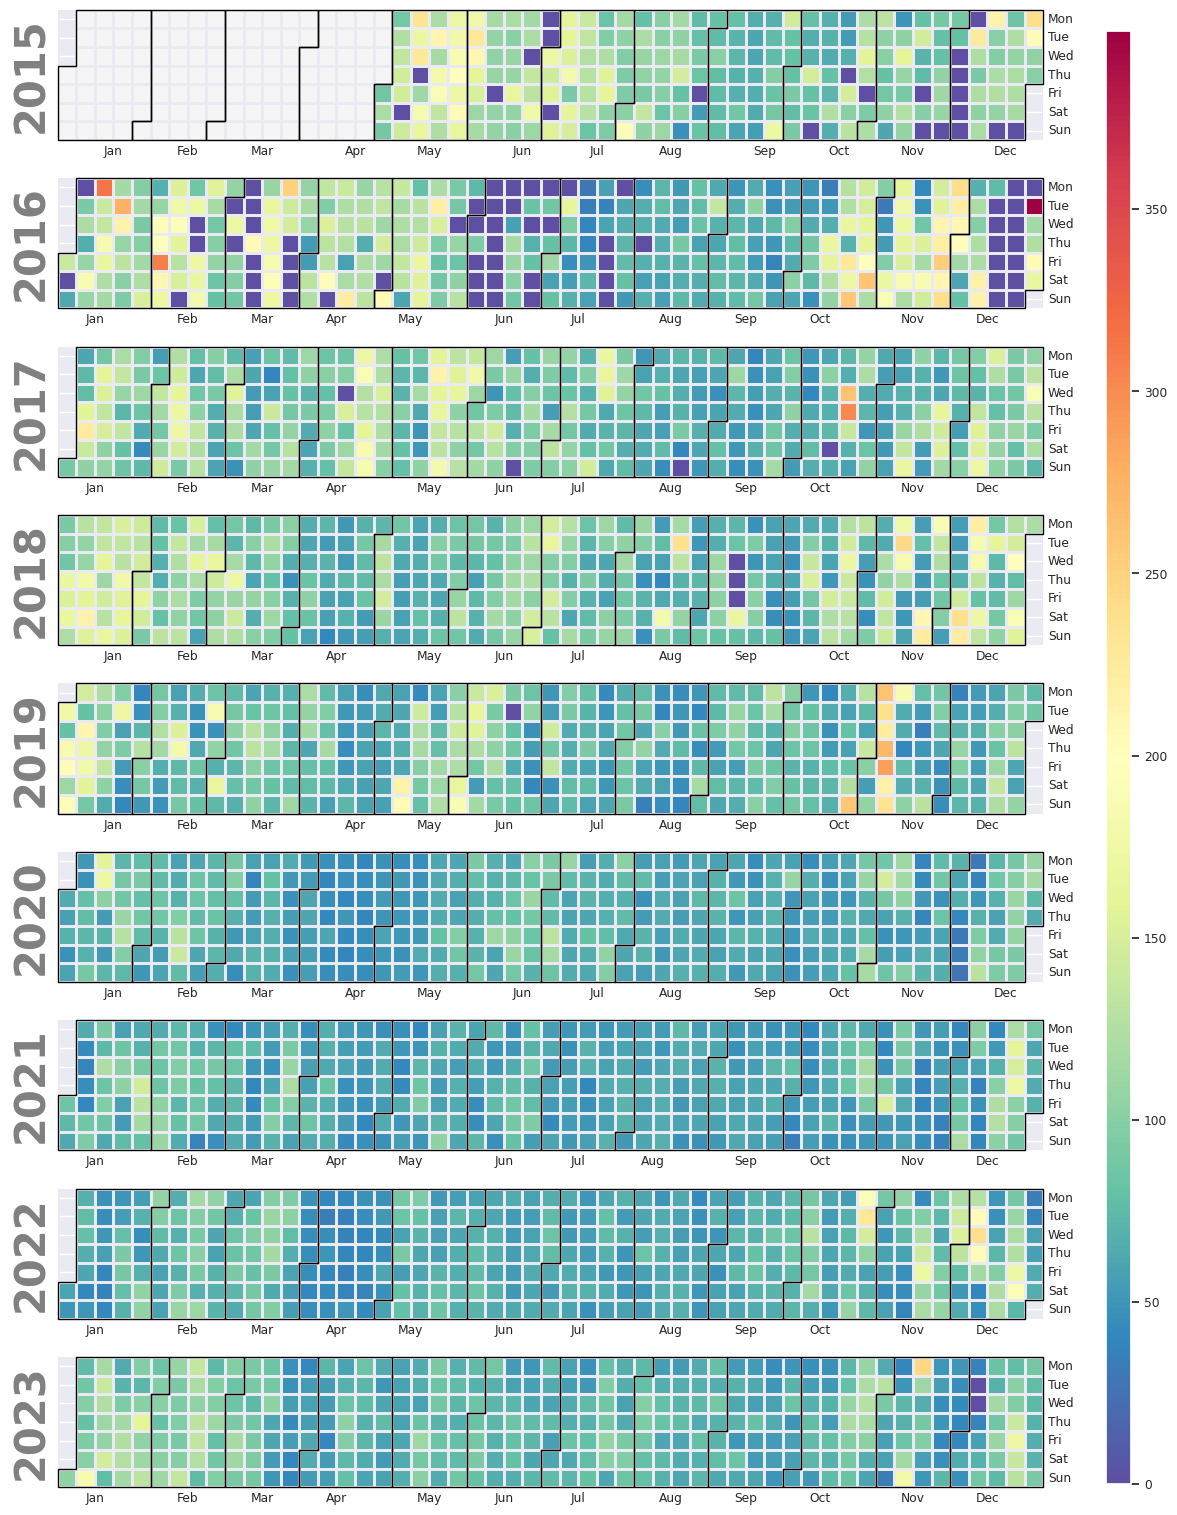

In [ ]:
#visualise the daily AQI values as a calendar plot

plt.figure(dpi=600)

values = pd.Series(df['Index Value'].values, index=df['date'])

calplot.calplot(values, linewidth=1, edgecolor = 'black', cmap = 'Spectral_r')

plt.show()

In [ ]:
#Create a pivot table that counts the number of days each air quality category occurred per year

column_order = ['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very Poor']

air_quality_no_of_days = pd.pivot_table(df, index=df['date'].dt.year, columns=df['Air Quality'], values='Index Value',
                                        aggfunc='count', fill_value=0).reindex(column_order, axis=1)

air_quality_no_of_days

Air Quality,Good,Satisfactory,Moderate,Poor,Very Poor
date,,,,,
2015,2,91,120,10,0
2016,21,123,134,24,3
2017,17,208,132,3,1
2018,15,193,146,8,0
2019,43,230,79,12,0
2020,61,274,31,0,0
2021,74,266,25,0,0
2022,70,253,38,4,0
2023,32,276,54,1,0


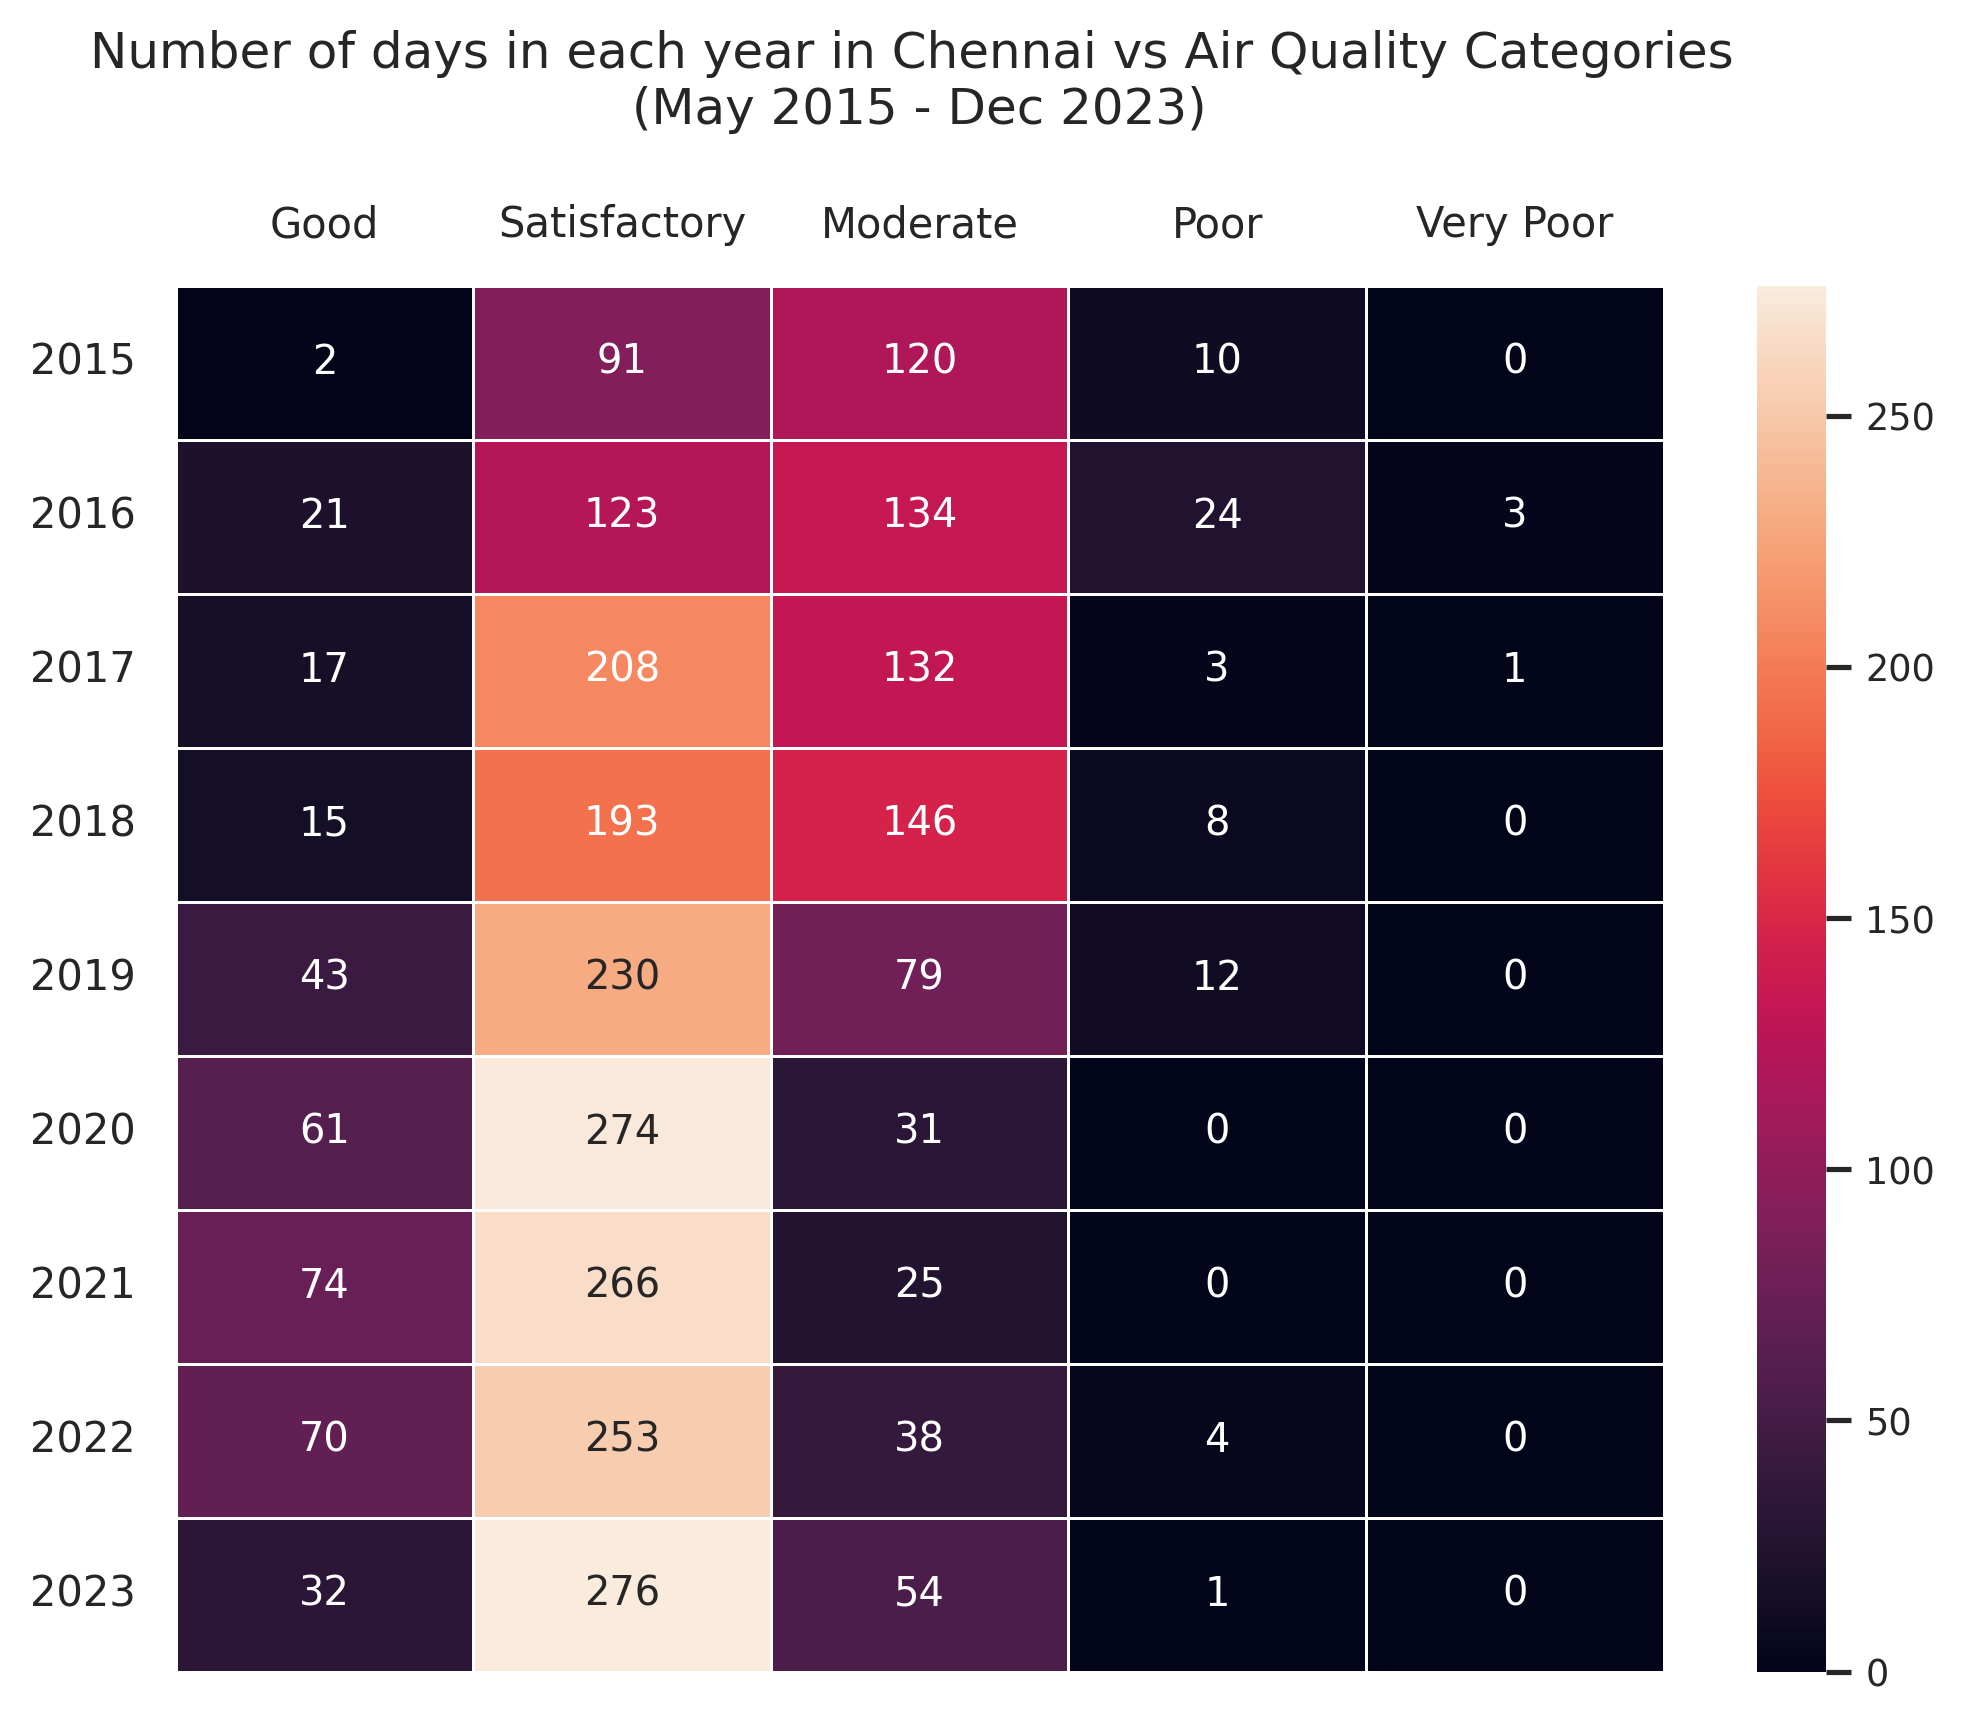

In [ ]:
#visualise the number of days each air quality category occurred per year as a heatmap

sns.set(font_scale=0.8)
plt.figure(dpi=300)
ax = sns.heatmap(air_quality_no_of_days, annot=True, fmt="d", linewidths=0.3)
fig = ax.get_figure()
fig.set_size_inches(8, 6)
ax.set_title('Number of days in each year in Chennai vs Air Quality Categories \n(May 2015 - Dec 2023)\n', fontsize=12)
ax.set_ylabel('')
ax.set_xlabel('')
plt.yticks(rotation=0)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
fig.show()

In [ ]:
df['Prominent Pollutant'] = df['Prominent Pollutant'].str.split(',').map(lambda elements: [e.strip() for e in elements])

In [ ]:
df.head(15)

,date,City,No. Stations,Air Quality,Index Value,Prominent Pollutant
0,2015-05-01,Chennai,NaN,Satisfactory,87,[CO]
1,2015-05-02,Chennai,NaN,Moderate,120,[PM2.5]
2,2015-05-03,Chennai,NaN,Satisfactory,90,[PM2.5]
3,2015-05-04,Chennai,NaN,Satisfactory,88,[PM2.5]
4,2015-05-05,Chennai,NaN,Moderate,124,[PM2.5]
5,2015-05-06,Chennai,NaN,Moderate,135,[PM2.5]
6,2015-05-07,Chennai,NaN,Moderate,146,[PM2.5]
7,2015-05-08,Chennai,NaN,Moderate,146,[PM2.5]
8,2015-05-10,Chennai,NaN,Moderate,143,[PM2.5]
9,2015-05-11,Chennai,NaN,Poor,233,"[CO, PM2.5]"


In [ ]:
print(df['Prominent Pollutant'].explode().unique())

['CO' 'PM2.5' 'SO2' 'O3' 'NO2' 'OZONE' 'PM10' 'NH3']


In [ ]:
# Group by year and month, then count the occurrences of each prominent pollutant

df_exploded = df.explode('Prominent Pollutant')
df_exploded.groupby([df_exploded['date'].dt.year, df_exploded['date'].dt.month])['Prominent Pollutant'].value_counts()

date  date  Prominent Pollutant
2015  5     PM2.5                  28
            CO                      3
      6     PM2.5                  25
            CO                     12
      7     PM2.5                  27
                                   ..
2023  12    PM10                   21
            PM2.5                  14
            CO                      9
            O3                      5
            NO2                     1
Name: count, Length: 402, dtype: int64

In [ ]:
#Create a separate dataframe with date as index and AQI as value

df_date = df[['date', 'Index Value']]
df_date.set_index('date', inplace=True)
df_date.head(10)

,Index Value
date,
2015-05-01,87
2015-05-02,120
2015-05-03,90
2015-05-04,88
2015-05-05,124
2015-05-06,135
2015-05-07,146
2015-05-08,146
2015-05-10,143


In [ ]:
#Take 80% of the total no. of values as training data 

dataset = df_date.values
training_data_len = math.ceil(len(dataset)*0.8)
training_data_len

2460

In [ ]:
#Applies MinMax scaling using MinMaxScaler to normalize the data within the range [0, 1]

sc = MinMaxScaler(feature_range=(0, 1))
scaled_data = sc.fit_transform(dataset)
scaled_data

array([[0.15902965],
       [0.24797844],
       [0.1671159 ],
       ...,
       [0.10242588],
       [0.11590296],
       [0.17520216]])

In [ ]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []
num = 60

for i in range(num, len(train_data)):
    x_train.append(train_data[i-num:i , 0])
    y_train.append(train_data[i , 0])

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2400, 60, 1)

In [ ]:
#Create a sequential neural network model with two LSTM layers followed by dense layers

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#Compile the model using the Adam optimizer and mean squared error as the loss function

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
#Train the model

model.fit(x_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 108s 44ms/step - loss: 0.0081
Epoch 2/5
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 120s 34ms/step - loss: 0.0066
Epoch 3/5
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 136s 32ms/step - loss: 0.0069
Epoch 4/5
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 80s 31ms/step - loss: 0.0061
Epoch 5/5
2400/2400 ━━━━━━━━━━━━━━━━━━━━ 86s 33ms/step - loss: 0.0068


In [ ]:
test_data = scaled_data[training_data_len-60:, :]
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(num, len(test_data)):
      x_test.append(test_data[i-num:i, 0])

In [ ]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
#Generate the predictions, scale the predictions back to the original range and calculate the Root Mean Square Error (RMSE) to evaluate the model's performance

predictions = model.predict(x_test)
predictions = sc.inverse_transform(predictions)

rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


6.207278633738962

In [ ]:
train = df_date[:training_data_len]
valid = df_date[training_data_len:]

valid['Predictions'] = predictions
valid

,Index Value,Predictions
date,,
2022-04-25,47,59.138180
2022-04-26,52,60.904339
2022-04-27,43,63.758163
2022-04-28,45,58.707146
2022-04-29,61,60.428375
...,...,...
2023-12-27,74,89.213707
2023-12-28,70,86.712097
2023-12-29,66,84.330498


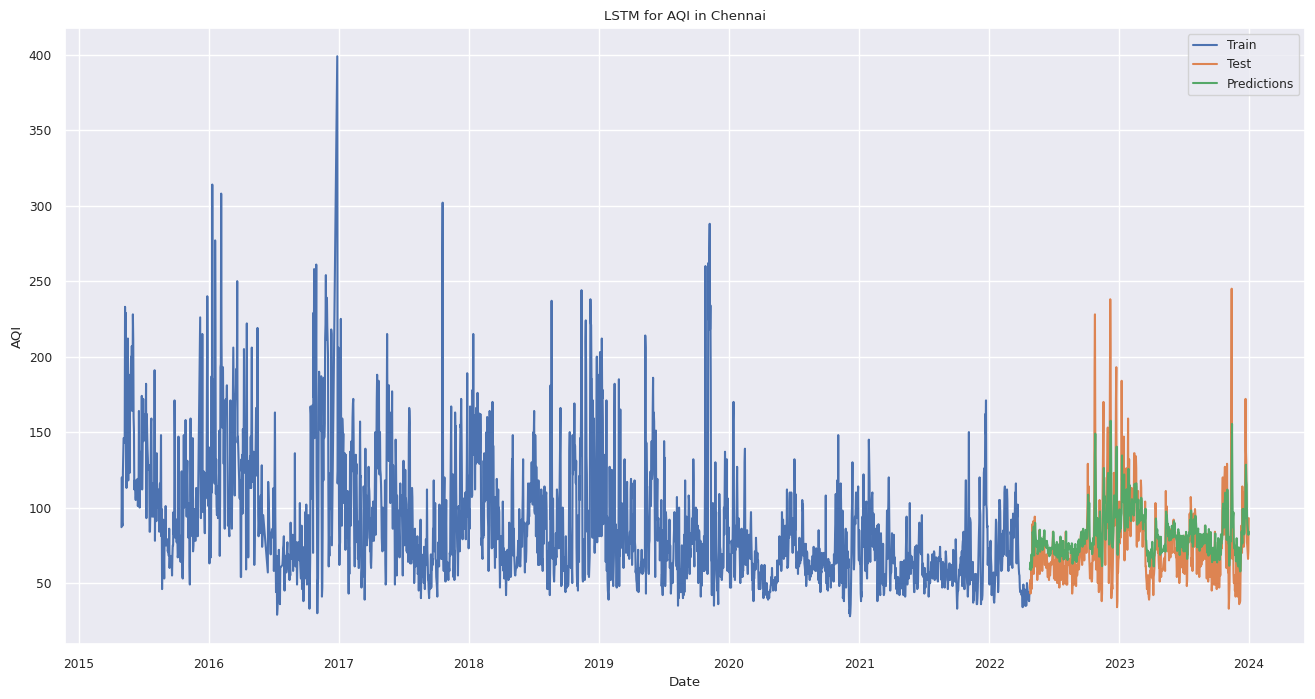

In [ ]:
#Visualise the true and predicted AQI values

plt.figure(figsize=(16, 8))
plt.title("LSTM for AQI in Chennai")
plt.xlabel('Date')
plt.ylabel('AQI')

plt.plot(train[df_date.columns])
plt.plot(valid['Index Value'])
plt.plot(valid["Predictions"])
plt.legend(['Train', 'Test', 'Predictions'])
plt.show()